The Problem:
I have a folder containing images of three and four digit numbers from which I need to accurately read the digits. These are three channel image files. I want to use a CRNN for this.

Inputs:
I have created a folder called digits that contains 200000 images of single digits using similar fonts. I also have a csv file called "digit_training_data.csv" that contains the columns "file_name" shich is the file name and "digit" ehich is the valus or label of the digit.

Output:
I need to take one of the image files such as "./cropped_images/9/S09_F01_Cropped.png" and detect the digits within this image file.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import cv2
import os

import numpy as np
import pandas as pd

import sys
sys.path.append("../project_functions/")
import ad_functions as adfns
import ad_crnn_functions as adcrn
import ad_funcs as adf
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split


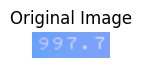

Image Shape:  (247, 726, 3)


In [3]:
img = cv2.imread("./cropped_images/9/S09_F01_Cropped.png")

adfns.show_img(img, size=1, title="Original Image")

print("Image Shape: ", img.shape)

In [6]:
# Load the CSV file
csv_path = "digit_training_data.csv"
df = pd.read_csv(csv_path)

In [7]:
# Load and preprocess images
X = [adf.preprocess_image(f"./digits/{row['file_name']}") for _, row in df.iterrows()]
X = np.array(X)


In [8]:
# One-hot encode labels
y = to_categorical(df['digit'].values, num_classes=11)


In [9]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 * 0.8 = 0.2


In [10]:
# Build the model
input_shape = (32, 32, 1)
num_classes = 11
crnn_model = adf.build_crnn_model(input_shape, num_classes)

In [11]:
# Train the model
batch_size = 128
epochs = 20
# crnn_model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=1)

crnn_model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False), metrics=['accuracy'])



In [12]:

# Evaluate the model
test_loss, test_acc = crnn_model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)

1250/1250 [==============================] - 9s 5ms/step - loss: 2.3974 - accuracy: 0.1000
Test accuracy: 0.1000249981880188


In [13]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)